In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  #evaluate the mode, find accuracies, etc

Data collection and processing 

In [3]:
cardataset = pd.read_csv('cardekho.csv')

In [4]:
cardataset['engine'] = cardataset['engine'].fillna(cardataset['engine'].median())

In [5]:
cardataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [6]:
cardataset.shape # checking the rows and columns

(8128, 12)

In [7]:
cardataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [8]:
#for checking the number of missing values 
cardataset.isnull().sum()


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                  0
max_power             215
seats                 221
dtype: int64

In [9]:
#to check for categorial data
print(cardataset.fuel.value_counts())
print(cardataset.seller_type.value_counts())
print(cardataset.transmission.value_counts())

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64


Encoading the categorial data

In [10]:
cardataset.replace({'fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3}},inplace=True)
cardataset.replace({'seller_type':{'Dealer':0, 'Individual':1, 'Trustmark Dealer':2}},inplace=True)
cardataset.replace({'transmission':{'Manual':0, 'Automatic':1}},inplace=True)
cardataset.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


C:\Users\sajal\AppData\Local\Temp\ipykernel_10116\964504828.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cardataset.replace({'fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3}},inplace=True)
C:\Users\sajal\AppData\Local\Temp\ipykernel_10116\964504828.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cardataset.replace({'seller_type':{'Dealer':0, 'Individual':1, 'Trustmark Dealer':2}},inplace=True)
C:\Users\sajal\AppData\Local\Temp\ipykernel_10116\964504828.py:3: FutureWarning: Downcasting behavior in `replace` is deprecate

In [11]:
cardataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,0,0,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,0,1,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,0,2,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,0,0,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,0,0,16.10,1298.0,88.2,5.0


Splitting the data and target

In [12]:
X = cardataset.drop(['name','selling_price','mileage(km/ltr/kg)','max_power', 'seats'], axis=1)
Y = cardataset['selling_price']

In [13]:
X['engine'] = X['engine'].fillna(X['engine'].median())

In [14]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner  engine
0     2014     145500     1            1             0      0  1248.0
1     2014     120000     1            1             0      1  1498.0
2     2006     140000     0            1             0      2  1497.0
3     2010     127000     1            1             0      0  1396.0
4     2007     120000     0            1             0      0  1298.0
...    ...        ...   ...          ...           ...    ...     ...
8123  2013     110000     0            1             0      0  1197.0
8124  2007     119000     1            1             0      3  1493.0
8125  2009     120000     1            1             0      0  1248.0
8126  2013      25000     1            1             0      0  1396.0
8127  2013      25000     1            1             0      0  1396.0

[8128 rows x 7 columns]


In [15]:
print(Y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64


Splitting training and test data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=2)

Model Training



LINEAR REGRESSION

In [17]:
lin_reg_model=LinearRegression()


In [18]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [19]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [20]:
error_score=metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.5588470578171785


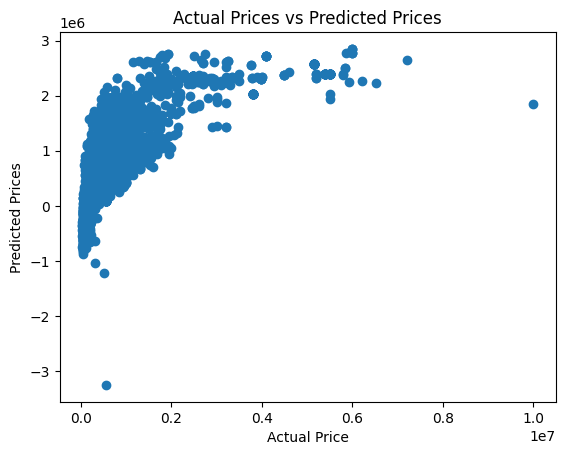

In [21]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [26]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)


In [29]:
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.5800088197672868


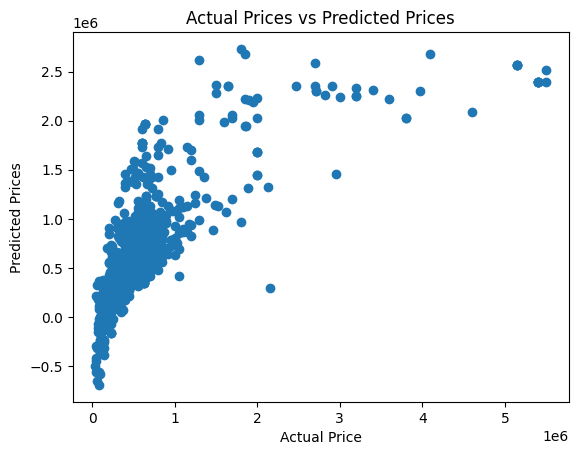

In [24]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()